In [38]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

import pandas as pd
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [39]:

data = df['Close']
data

,Close
0,4.778000
1,4.766000
2,4.392000
3,3.840000
4,3.222000
...,...
2951,905.390015
2952,921.159973
2953,993.979980
2954,999.109985


In [40]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [41]:
df = df.drop(['Date', 'Adj Close', 'Close', 'Volume'], axis=1)

In [42]:
df

,Open,High,Low
0,3.800000,5.000000,3.508000
1,5.158000,6.084000,4.660000
2,5.000000,5.184000,4.054000
3,4.600000,4.620000,3.742000
4,4.000000,4.000000,3.166000
...,...,...,...
2951,874.489990,907.849976,867.390015
2952,914.979980,942.849976,907.090027
2953,930.000000,997.859985,921.750000
2954,979.940002,1040.699951,976.400024


In [47]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

window = 3
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)


train_size = int(len(y) * 0.7)
train_X = np.array(X[0 : train_size])
train_y = np.array(y[0 : train_size])

test_size = len(y) - train_size
test_X = np.array(X[train_size : len(X)])
test_y = np.array(y[train_size : len(y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (2067, 3, 1) (2067, 1)
테스트 데이터의 크기 : (886, 3, 1) (886, 1)


In [48]:
Dmodel= tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:

Lmodel = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])

In [50]:
Dmodel.compile(optimizer='adam', loss='mse')
Dmodel.fit(train_X, train_y, epochs=30, batch_size=8, verbose=1)

Epoch 1/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0462
Epoch 2/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.1517e-05
Epoch 3/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0471e-05
Epoch 4/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3580e-05
Epoch 5/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.2901e-05
Epoch 6/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3089e-05
Epoch 7/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9755e-05
Epoch 8/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.3573e-05
Epoch 9/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0761e-05
Epoch 10/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0467e-05
Epoch 11/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5209e-05
Epoch 12/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8597e-05
Epoch 13/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6531e-05
Epoch 14/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0393e-04
Epoch

In [51]:
Dy_pred = Dmodel.predict(test_X)
Dmse = tf.reduce_mean(tf.square(test_y - Dy_pred))
print(f'DNN MSE: {Dmse.numpy()}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
DNN MSE: 0.23898516110820647


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0452    
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


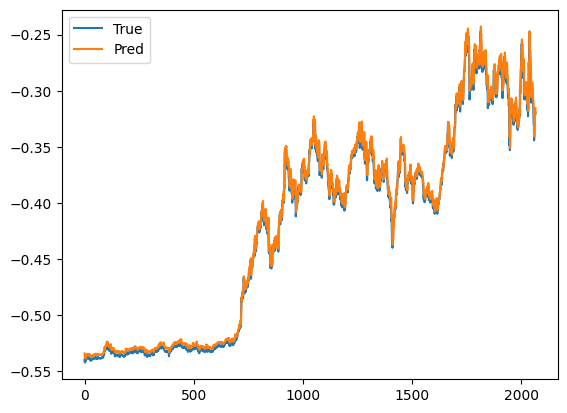

In [52]:
Dmodel.evaluate(test_X, test_y)
pred = Dmodel.predict(train_X)
plt.plot(scaler.inverse_transform(train_y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

In [54]:
Lmodel.compile(optimizer='adam', loss='mse')
Lmodel.fit(train_X, train_y, epochs=30, batch_size=8, verbose=1)

Epoch 1/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.1219e-05
Epoch 2/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6747e-05
Epoch 3/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9158e-05
Epoch 4/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8386e-05
Epoch 5/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1730e-05
Epoch 6/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2731e-05
Epoch 7/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9794e-05
Epoch 8/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5323e-05
Epoch 9/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8991e-05
Epoch 10/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9101e-05
Epoch 11/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9929e-05
Epoch 12/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3350e-05
Epoch 13/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5383e-05
Epoch 14/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9335e-05
E

In [55]:
Ly_pred = Lmodel.predict(test_X)
Lmse = tf.reduce_mean(tf.square(test_y - Ly_pred))
print(f'LSTM MSE: {Lmse.numpy()}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
LSTM MSE: 0.37090578739866203


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0773
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


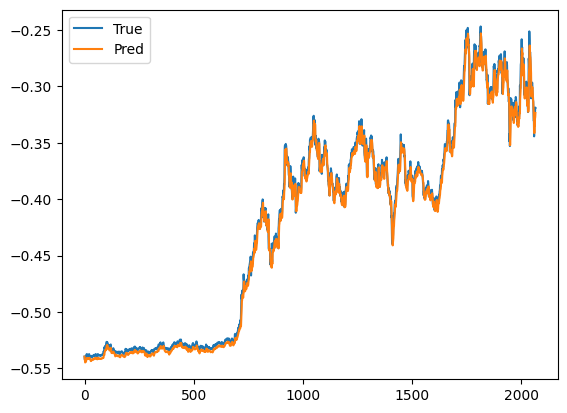

In [56]:
Lmodel.evaluate(test_X, test_y)
pred = Lmodel.predict(train_X)
plt.plot(scaler.inverse_transform(train_y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()